In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
data=pd.read_csv("supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
Total,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65


In [17]:
df=data

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Branch']=le.fit_transform(df['Branch'])
df['City']=le.fit_transform(df['City'])
df['Customer type']=le.fit_transform(df['Customer type'])
df['Product line']=le.fit_transform(df['Product line'])
df['Payment']=le.fit_transform(df['Payment'])

In [19]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment
0,750-67-8428,0,2,0,0,3,74.69,7,548.9715,2
1,226-31-3081,2,1,1,0,0,15.28,5,80.2200,0
2,631-41-3108,0,2,1,1,4,46.33,7,340.5255,1
3,123-19-1176,0,2,0,1,3,58.22,8,489.0480,2
4,373-73-7910,0,2,1,1,5,86.31,7,634.3785,2


In [20]:
df=df.drop('Invoice ID',axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment
0,0,2,0,0,3,74.69,7,548.9715,2
1,2,1,1,0,0,15.28,5,80.2200,0
2,0,2,1,1,4,46.33,7,340.5255,1
3,0,2,0,1,3,58.22,8,489.0480,2
4,0,2,1,1,5,86.31,7,634.3785,2


<function matplotlib.pyplot.show(close=None, block=None)>

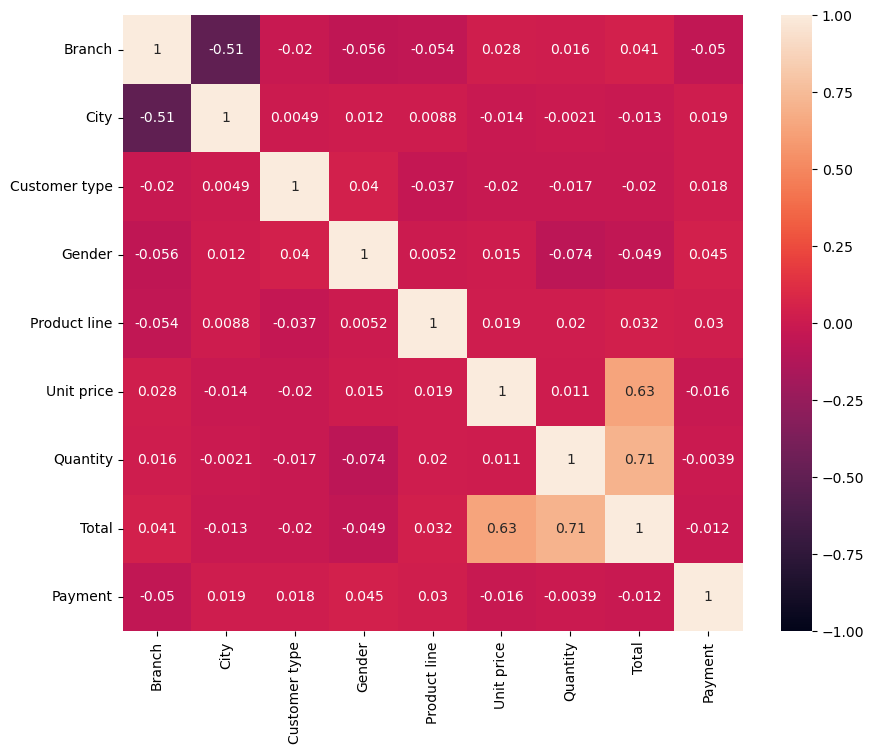

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show

array([[<Axes: title={'center': 'Branch'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Customer type'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Product line'}>,
        <Axes: title={'center': 'Unit price'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Payment'}>]], dtype=object)

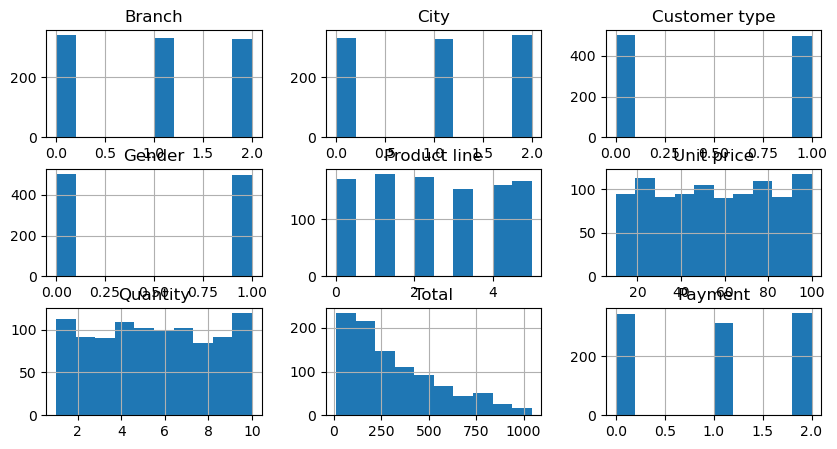

In [22]:
df.hist(figsize=(10,5))

<Axes: >

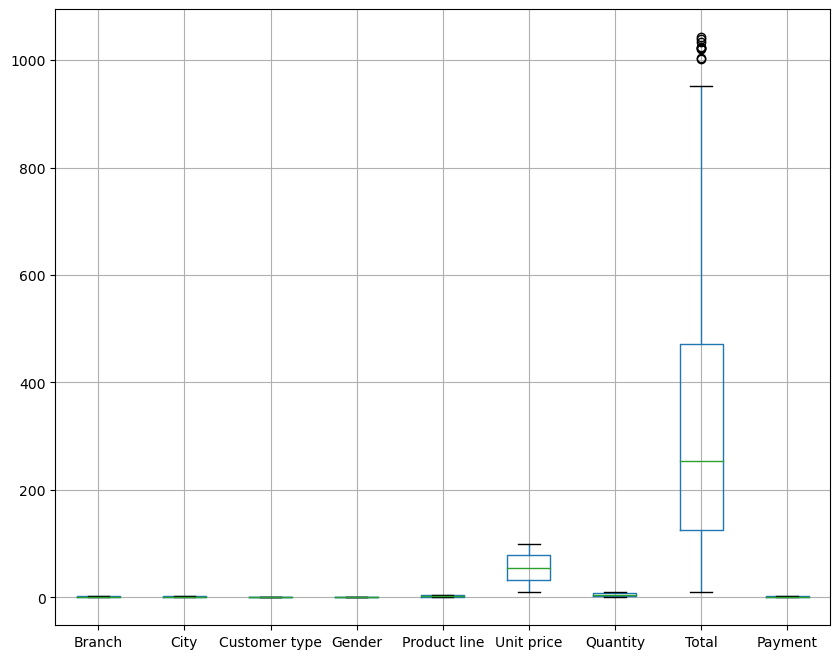

In [26]:
df.boxplot(figsize=(10,8))

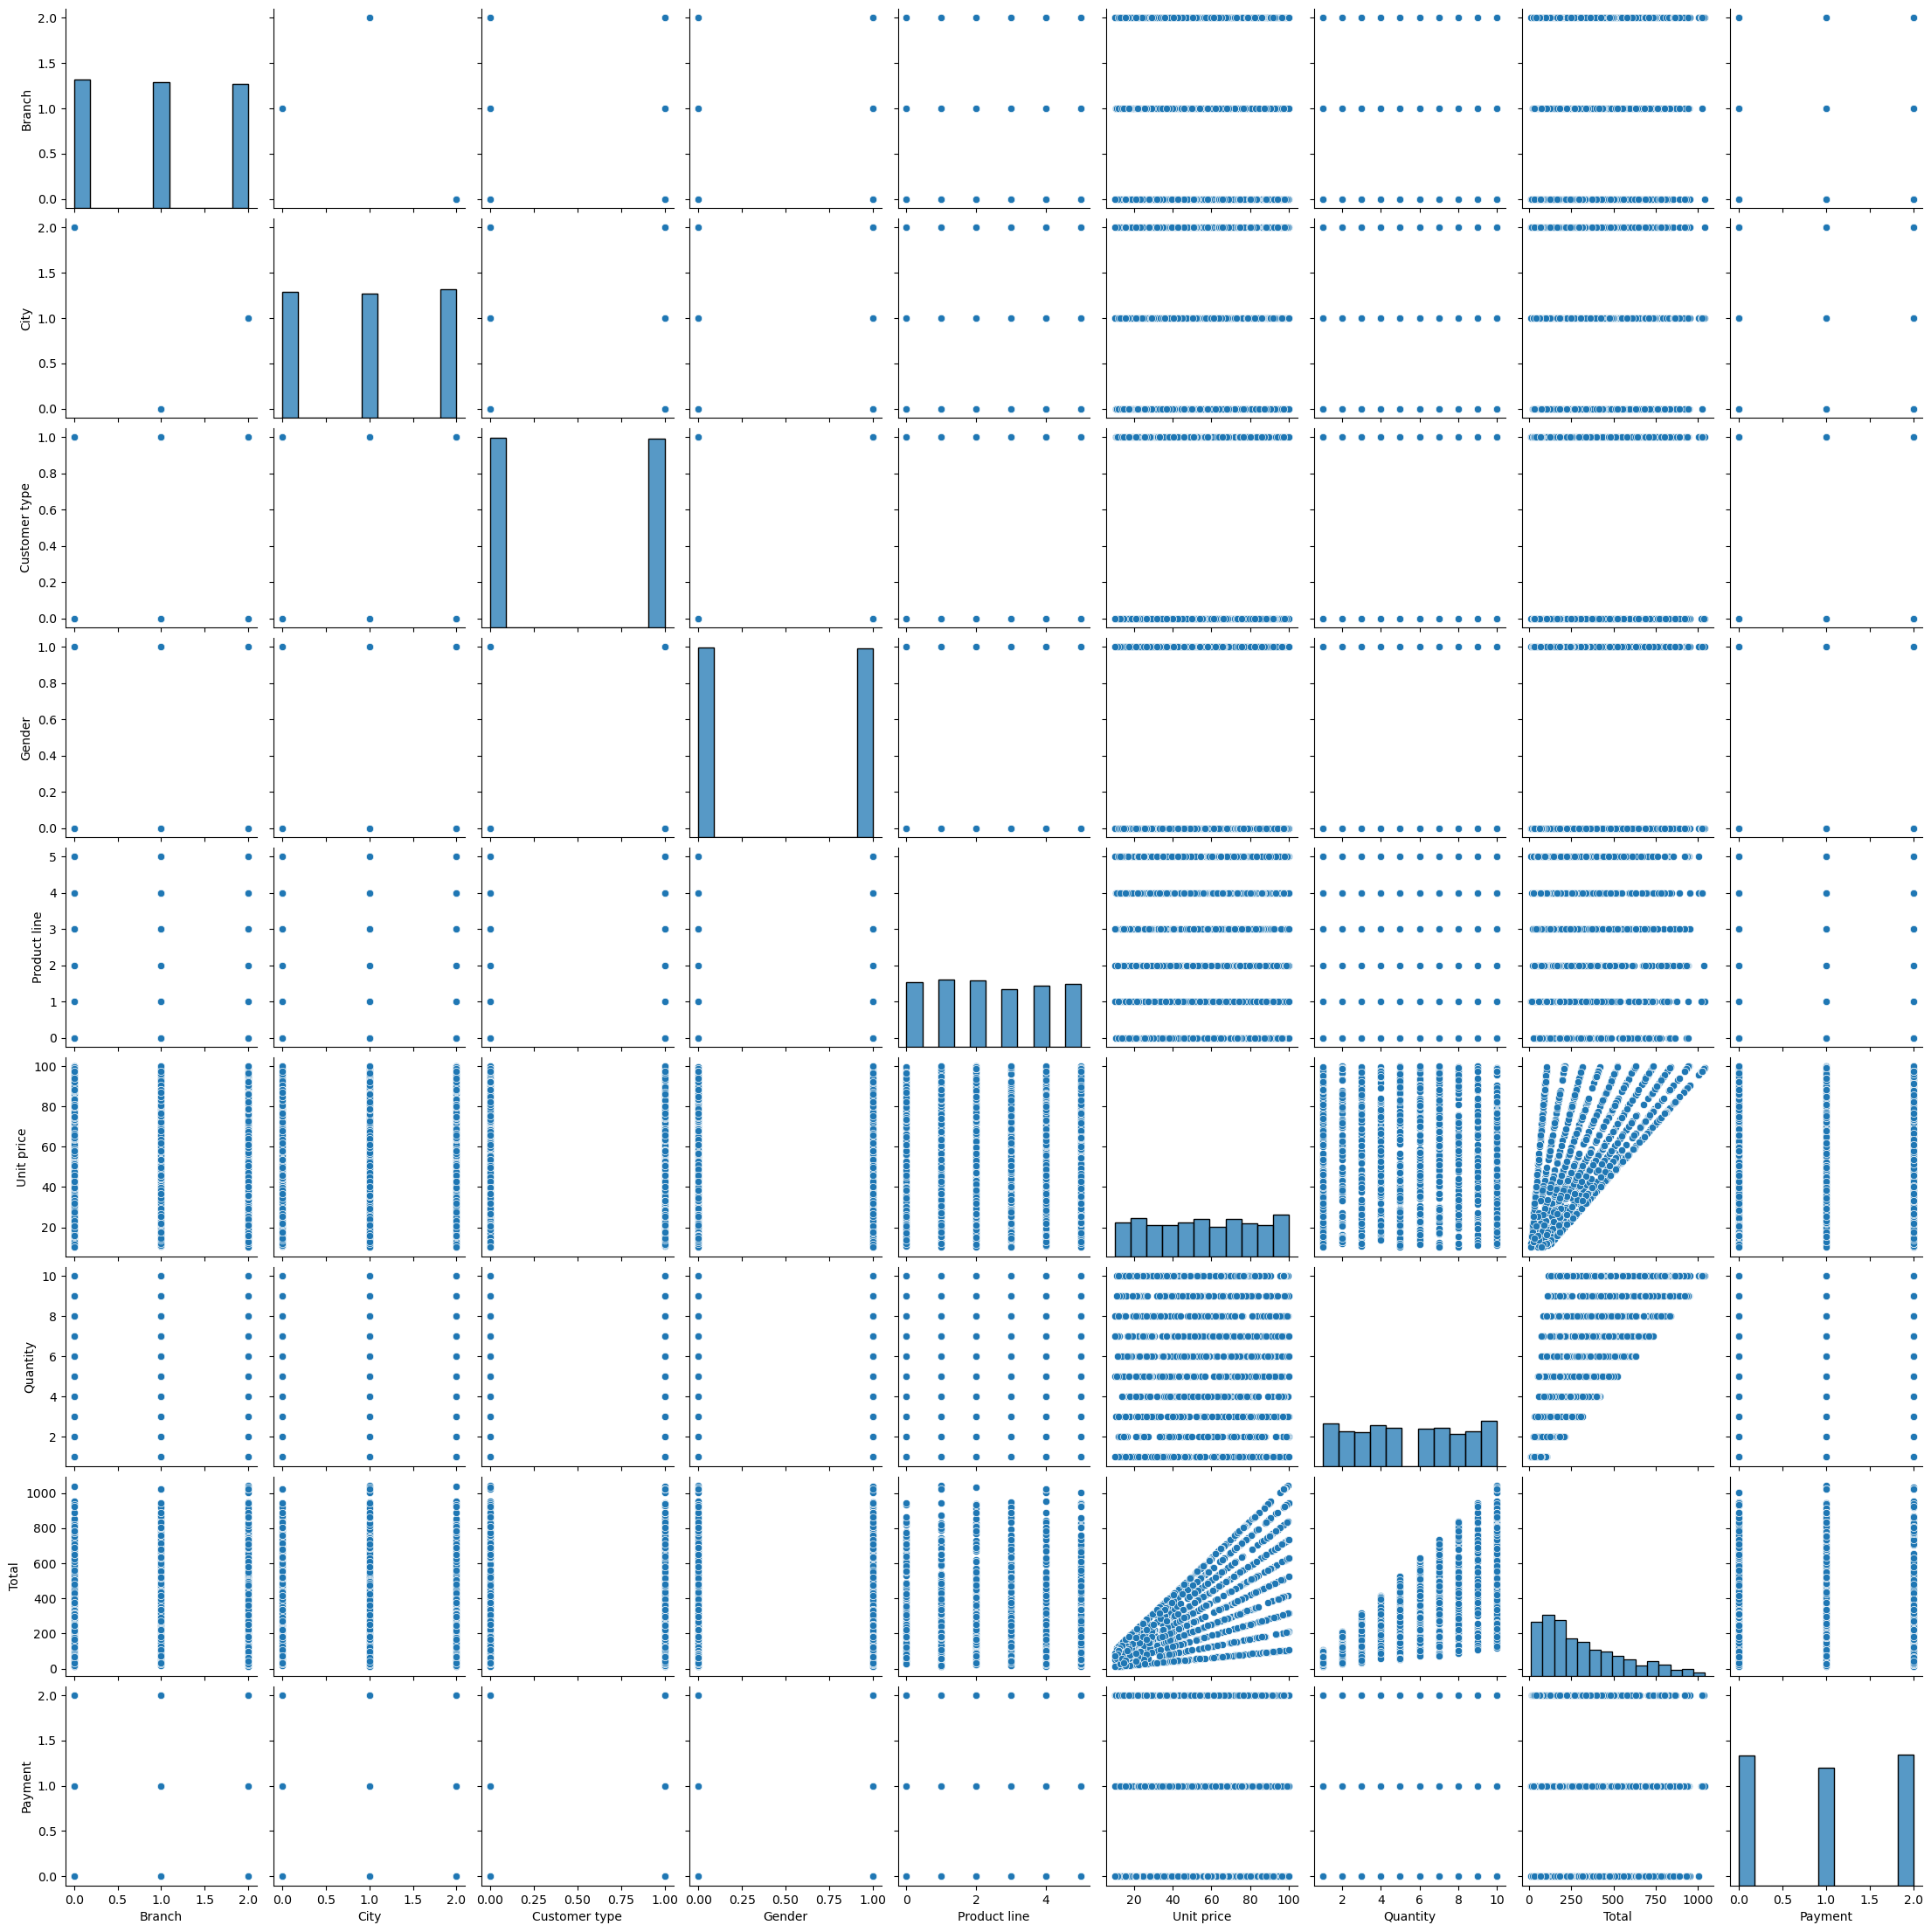

In [27]:
sns.pairplot(df)

In [29]:
x=df[['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment']]
x.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment
0,0,2,0,0,3,74.69,7,2
1,2,1,1,0,0,15.28,5,0
2,0,2,1,1,4,46.33,7,1
3,0,2,0,1,3,58.22,8,2
4,0,2,1,1,5,86.31,7,2


In [30]:
y=df[['Total']]
y.head()

,Total
0,548.9715
1,80.2200
2,340.5255
3,489.0480
4,634.3785


In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(800, 8)

(800, 1)

(200, 8)

(200, 1)


In [33]:
#SVR with non linear kernal -rbf
svr=SVR()
print('='*50)
print('Hyperparameter:\n',svr.get_params())
print('='*50)
svr.fit(xtrain,ytrain)
#testing phase
ypred=svr.predict(xtest)
print("Predicted price:\n",ypred)
print('='*50)
#perfromance measure
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R squared error:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [349.59719732 355.52770544 306.26258436 181.45159164 353.19738965
 192.87892986 226.43603262 176.88387135 205.45380658 350.35579315
 203.15780674 323.66989315 178.59693037 342.66909241 224.72765664
 352.81797222 207.10684862 321.01146673 343.85859163 302.37227139
 188.17574264 246.01314673 222.97042562 319.01018945 357.3650194
 272.54932886 218.09741902 211.43469942 178.3154147  315.82565142
 201.49962629 247.3899245  211.31427741 353.61570639 357.36270694
 356.55984805 344.06208923 356.91337686 176.23215517 320.67316231
 190.96401273 281.9338132  254.70493885 343.75653692 350.6198088
 208.49146836 353.02472523 281.02988173 191.63597257 230.38358082
 180.02849639 355.30417023 270.07714298 314.8044782  329.99251871
 203.78397925 251.3703777  330.20447283 239.68899632 258.60564522


C:\Users\Vishnu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
#SVR with non linear kernal -linear
svr=SVR(kernel='linear')
print('='*50)
print('Hyperparameter:\n',svr.get_params())
print('='*50)
svr.fit(xtrain,ytrain)
#testing phase
ypred=svr.predict(xtest)
print("Predicted price:\n",ypred)
print('='*50)
#perfromance measure
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R squared error:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 527.98938575  489.55501217  343.3801262   323.65075637  356.28467561
  -61.21420987  127.30212783  188.06300538  246.81799523  746.12494147
  404.50611131  658.41239242  -68.70148975  659.13049222  293.51988115
  547.05717815  251.12422543  430.3875771   237.75142836  168.98063249
  354.24245885  498.07061671  176.35650261  212.36223001  655.86439434
  112.9294597   386.65329827  -72.00947568   37.97935169  365.44811965
   15.21539301  115.00463327  317.49718703  399.55004641  669.76914296
  626.96568645  719.96878239  739.86471963   22.74503913  650.87185823
  362.91603978  405.05164779  186.05575579  663.27194846  280.34054973
   90.81059902  330.99535864  126.89003137 -123.04651086  -25.74805213
  264.13192603  510.01380143  161.367502    146.97526269  566.65683304
  129.

C:\Users\Vishnu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
#SVR with non linear kernal -sigmoid
svr=SVR(kernel='sigmoid')
print('='*50)
print('Hyperparameter:\n',svr.get_params())
print('='*50)
svr.fit(xtrain,ytrain)
#testing phase
ypred=svr.predict(xtest)
print("Predicted price:\n",ypred)
print('='*50)
#perfromance measure
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R squared error:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [257.84638972 250.88656782 266.87125714 218.34670549 253.04782703
 242.10557554 261.17926033 207.06512704 250.89445402 258.14928055
 248.27119153 264.84466505 219.96259003 260.80226142 259.93477019
 256.08836174 251.95928569 265.32826747 259.04667377 267.39803359
 232.37353712 265.08928018 259.82638899 265.02956179 251.01367635
 267.84723554 257.14243077 255.63292464 217.35211958 265.6860848
 249.37754697 265.88064198 253.88582251 249.01286706 249.56789581
 248.41021149 260.39091154 253.34828104 209.89915278 265.29630089
 236.21870729 267.93962038 266.57729021 260.51383511 255.02259349
 253.45382769 250.02843399 267.97067829 241.2774829  262.38059244
 216.56816157 248.89836026 267.97483601 265.52299151 263.61506317
 250.48856774 265.87041116 263.49729887 263.9118966  267.1170

C:\Users\Vishnu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
